In [1]:
def try_catch(x: int):
    try:
        print(x)
        x = x // 0
    except:
        print(x)
    print(x+1)

try_catch(1)

1
1
2


In [2]:
# Does append deepcopy?
import numpy as np
init_array = np.array([1,2,3])
big_boi = []
big_boi.append(init_array)
init_array = np.array([0,0,0])
print(big_boi)
print(init_array)

[array([1, 2, 3])]
[0 0 0]


In [3]:
years = list(range(2014, 2021))
for year in years:
    this_year = [year] * 6
    print(this_year)

[2014, 2014, 2014, 2014, 2014, 2014]
[2015, 2015, 2015, 2015, 2015, 2015]
[2016, 2016, 2016, 2016, 2016, 2016]
[2017, 2017, 2017, 2017, 2017, 2017]
[2018, 2018, 2018, 2018, 2018, 2018]
[2019, 2019, 2019, 2019, 2019, 2019]
[2020, 2020, 2020, 2020, 2020, 2020]


In [4]:
import numpy as np
a = [[1, 2, 3], [4, 5, 6]]
b = [[7, 8, 9],[10, 11, 12]]
c = [[13, 14, 15],[16, 17, 18]]
a = np.add(a, b)
print(a)

[[ 8 10 12]
 [14 16 18]]


In [5]:
import matplotlib.pyplot as plt
lol = np.load(open("1_by_1_deg_bloom_freq_2014.pickle", "rb"), allow_pickle=True)
plt.imshow(lol)

FileNotFoundError: [Errno 2] No such file or directory: '1_by_1_deg_bloom_freq_2014.pickle'

In [6]:
from PIL import Image
img = Image.open('testwms.png')
sheebai = np.array(img)

(6480000, 4)


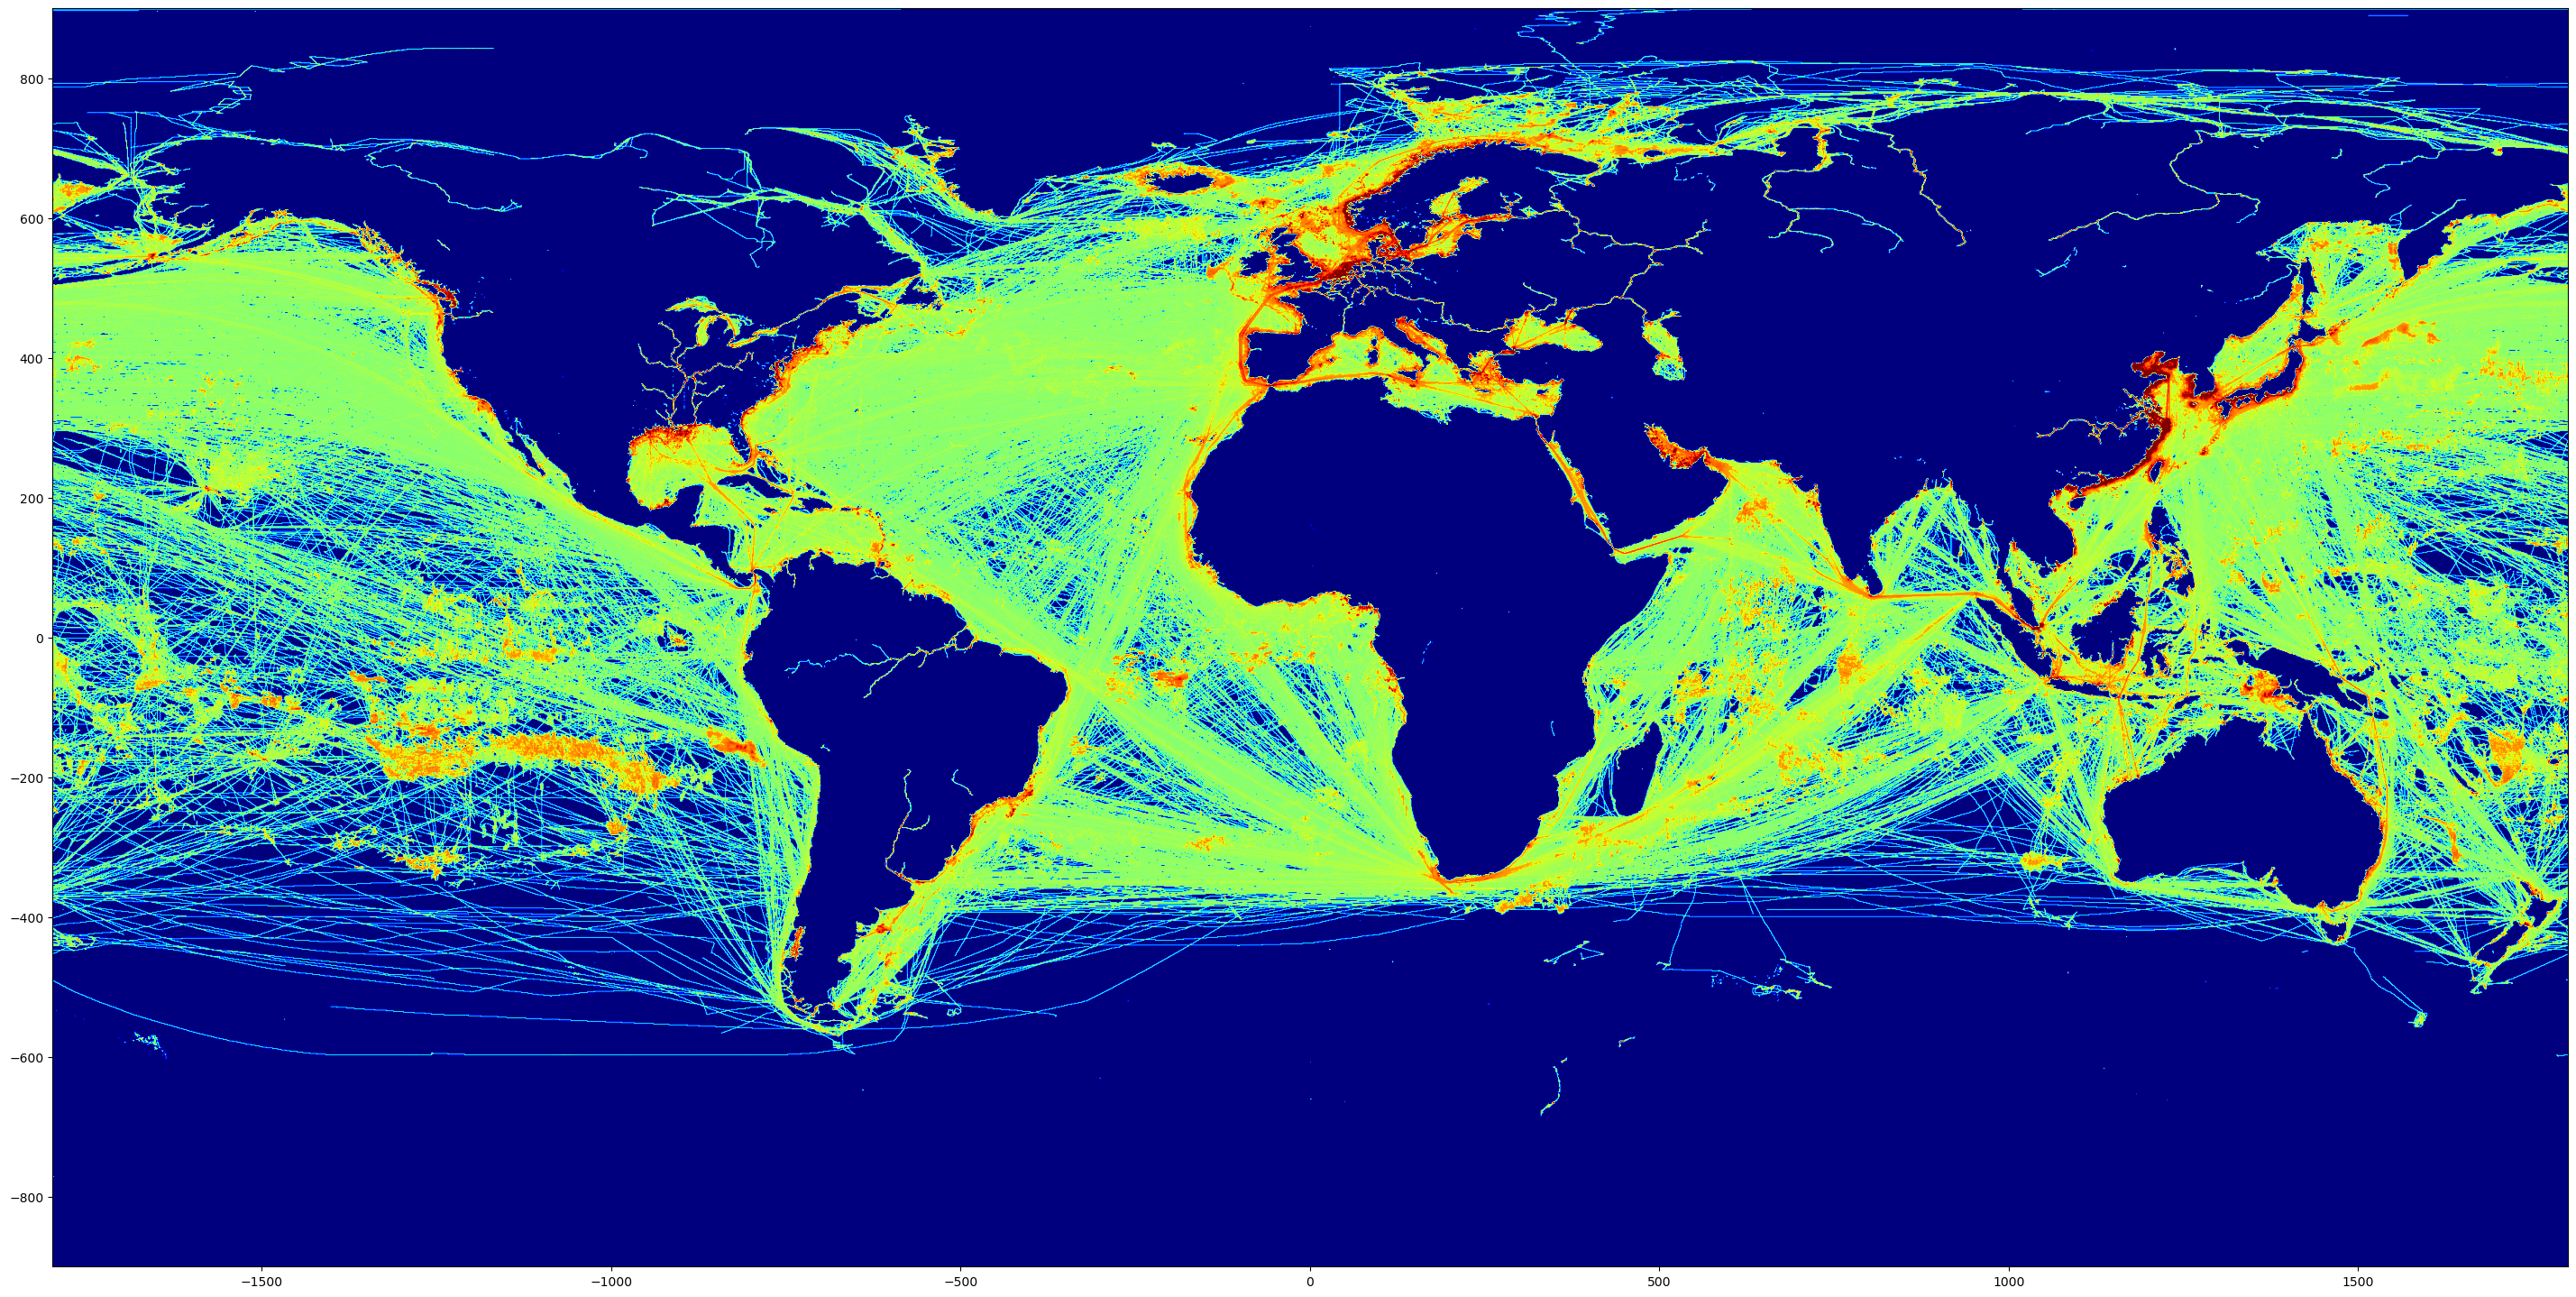

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import scipy.cluster.vq as scv
from mpl_toolkits.basemap import Basemap


def colormap2arr(arr,cmap):    
    # http://stackoverflow.com/questions/3720840/how-to-reverse-color-map-image-to-scalar-values/3722674#3722674
    gradient=cmap(np.linspace(0.0,1.0,100))

    # Reshape arr to something like (240*240, 4), all the 4-tuples in a long list...
    arr2=arr.reshape((arr.shape[0]*arr.shape[1],arr.shape[2]))
    print(arr2.shape)

    # Use vector quantization to shift the values in arr2 to the nearest point in
    # the code book (gradient).
    code,dist=scv.vq(arr2,gradient)

    # code is an array of length arr2 (240*240), holding the code book index for
    # each observation. (arr2 are the "observations".)
    # Scale the values so they are from 0 to 1.
    values=code.astype('float')/gradient.shape[0]

    # Reshape values back to (240,240)
    values=values.reshape(1800, 3600)
    values=values[::-1]
    return values
fig, ax = plt.subplots(figsize=(36,72))

arr=plt.imread('testwms.png')
values=colormap2arr(arr,cm.jet)    
# Proof that it works:
plt.imshow(values,interpolation='bilinear', cmap=cm.jet,
           origin='lower', extent=[-1800,1800,-900,900])


